<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/bankingProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#get data
df =pd.read_csv("/content/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
enc = {"job":{"unknown":0,"management": 1, "blue-collar": 2, "technician":3, "admin.":4, "services": 5, "retired":6,"self-employed":7,"student":8,
                       "unemployed":9,"entrepreneur":10, "housemaid":11},
           "marital":{"married":1,"single":2,"divorced":3},
           "education":{"secondary":2,"tertiary":3,"primary":1,"unknown":0},
           "default":{"yes":1,"no":0},
           "housing":{"yes":1, "no":0},
           "loan":{"yes":1, "no":0},
           "contact":{"unknown":0, "cellular":1, "telephone":2},
           "month":{"jan":1,"feb":2,"mar":3, "apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
           "poutcome":{"unknown":0,"failure":1,"success":2,"other":3},
           "deposit":{"yes":1,"no":0}}
df=df.replace(enc)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,2,0,2343,1,0,0,5,5,1042,1,-1,0,0,1
1,56,4,1,2,0,45,0,0,0,5,5,1467,1,-1,0,0,1
2,41,3,1,2,0,1270,1,0,0,5,5,1389,1,-1,0,0,1
3,55,5,1,2,0,2476,1,0,0,5,5,579,1,-1,0,0,1
4,54,4,1,3,0,184,0,0,0,5,5,673,2,-1,0,0,1


In [ ]:
#Encoding data
#le=preprocessing.LabelEncoder()
#categ=['job', 'marital','education', 'default','housing','loan','contact','month','poutcome','deposit']
#df[categ] =df[categ].apply(le.fit_transform)
#df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fff36c790>,
      dtype=object)

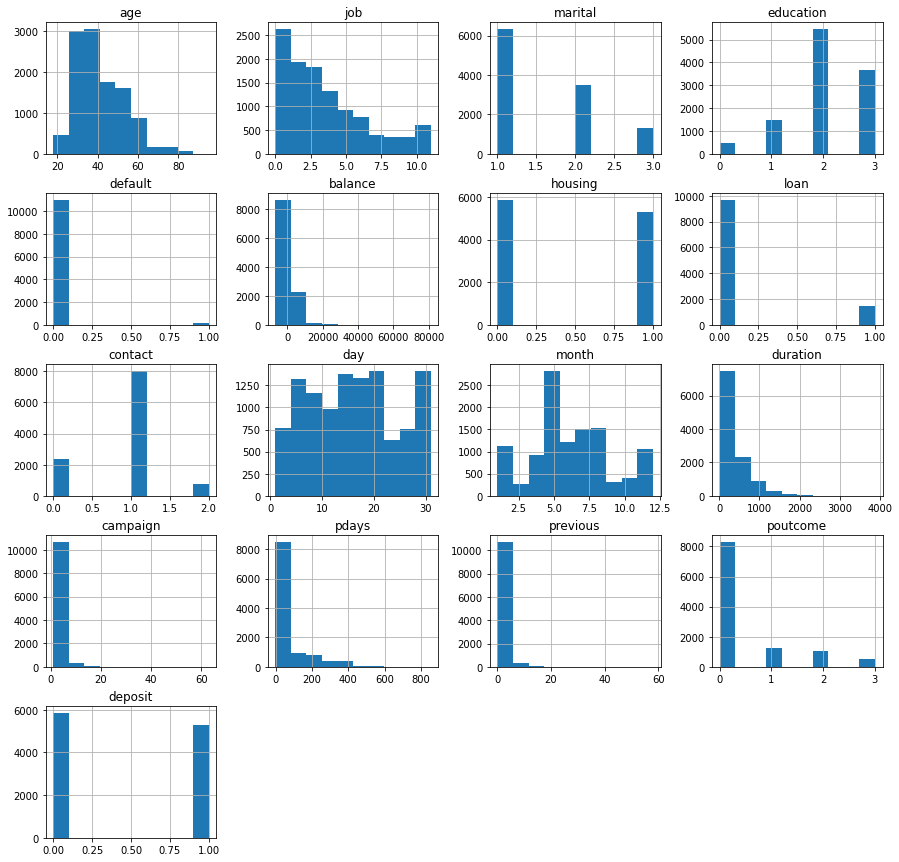

In [ ]:
#visualization
df.hist(figsize=[15,15])

In [ ]:
# features
x=df.drop(columns=['deposit']).values
# target
y = df['deposit']

In [ ]:
x

array([[ 59,   4,   1, ...,  -1,   0,   0],
       [ 56,   4,   1, ...,  -1,   0,   0],
       [ 41,   3,   1, ...,  -1,   0,   0],
       ...,
       [ 32,   3,   2, ...,  -1,   0,   0],
       [ 43,   3,   1, ..., 172,   5,   1],
       [ 34,   3,   1, ...,  -1,   0,   0]])

In [ ]:
from tensorflow.keras.utils import to_categorical
y= to_categorical(y)

In [ ]:
#normalization  
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
x=scaler.fit_transform(x)


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(x,y, test_size=0.1)
xmodel , xval , ymodel, yval= train_test_split(xtrain, ytrain, test_size=0.2)

In [ ]:
#building the model
model=tf.keras.Sequential()
model.add(layers.Input(xmodel.shape[1]))
model.add(layers.Dense(24,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(layers.Dense(24,activation='relu'))
#model.add(layers.Dense(32,activation='relu')) 
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(2, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(xmodel, ymodel , batch_size=32,epochs=60, validation_data=(xval, yval)) 

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


252/252 [==============================] - 2s 3ms/step - loss: 0.6009 - accuracy: 0.6951 - val_loss: 0.5091 - val_accuracy: 0.7581
Epoch 2/60
252/252 [==============================] - 1s 3ms/step - loss: 0.4949 - accuracy: 0.7646 - val_loss: 0.4688 - val_accuracy: 0.7795
Epoch 3/60
252/252 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.7858 - val_loss: 0.4565 - val_accuracy: 0.7904
Epoch 4/60
252/252 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.7947 - val_loss: 0.4502 - val_accuracy: 0.7929
Epoch 5/60
252/252 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8004 - val_loss: 0.4451 - val_accuracy: 0.7959
Epoch 6/60
252/252 [==============================] - 1s 3ms/step - loss: 0.4437 - accuracy: 0.8009 - val_loss: 0.4431 - val_accuracy: 0.7984
Epoch 7/60
252/252 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8015 - val_loss: 0.4419 - val_accuracy: 0.8004
Epoch 8/60
252/25

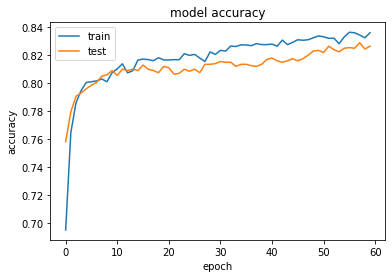

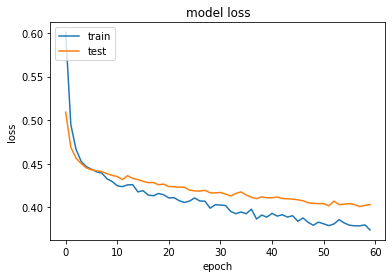

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluation 
test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

35/35 - 0s - loss: 0.3683 - accuracy: 0.8380 - 56ms/epoch - 2ms/step

Test accuracy: 83.7958812713623 %


In [ ]:
val_loss,val_acc = model.evaluate(xval,yval,verbose=2)

print('\nTest accuracy:', val_acc *100, '%')

63/63 - 0s - loss: 0.4031 - accuracy: 0.8263 - 85ms/epoch - 1ms/step

Test accuracy: 82.6281726360321 %
